In [94]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [215]:

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [216]:
#Importation des library necessaires
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix#, plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.tree import graphviz

# Analyse et description du jeu de données (toutes les informations sur le jeu données)

In [217]:

obese = pd.read_csv(r"C:\Users\DAFFE\Desktop\Projet IA\ObesityDataSet_raw_and_data_sinthetic.csv")


In [218]:
print("Notre jeu de données Obèse : \n", obese)

Notre jeu de données Obèse : 
       Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAV

# [2111 rows x 17 columns] 2111 lignes et 17 colonnes
# Avoir des informations sur le jeu de donnees

In [223]:

print(obese.info())
#Voir s'il y a des valeurs manquantes
print("Voir les valeurs manquantes :\n", obese.isnull().sum())
#On ne voit pas de valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [224]:
print("Description des données :\n", obese.describe())
# on a regardé les moyennes, min, max... et OKAY

Description des données :
                Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1

# Comprendre chaque variable

In [225]:

print('Gender :\n',obese['Gender'].unique())
print('family_history_with_overweight :\n',obese['family_history_with_overweight'].unique())
print('FAVC :\n',obese['FAVC'].unique())
print('CAEC :\n',obese['CAEC'].unique())
print('SMOKE :\n',obese['SMOKE'].unique())
print('SCC :\n',obese['SCC'].unique())
print('CALC :\n',obese['CALC'].unique())
print('MTRANS :\n',obese['MTRANS'].unique())
print('NObeyesdad :\n',obese['NObeyesdad'].unique())

Gender :
 ['Female' 'Male']
family_history_with_overweight :
 ['yes' 'no']
FAVC :
 ['no' 'yes']
CAEC :
 ['Sometimes' 'Frequently' 'Always' 'no']
SMOKE :
 ['no' 'yes']
SCC :
 ['no' 'yes']
CALC :
 ['no' 'Sometimes' 'Frequently' 'Always']
MTRANS :
 ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad :
 ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


# Toutes ces variables sembles normales : okay
# Voir les variables numeriques aberantes

In [226]:
print('Age :\n',obese['Age'].describe())
#Tous les ages semblent normaux regardant le min et max donc Okay
print('Height :\n',obese['Height'].describe())
#Toutes les hauteurs semblent normales regardant le min et max donc Okay
print('Weight :\n',obese['Weight'].describe())
#Tous les poids semblent normaux regardant le min et max donc Okay
print(obese['FCVC'].unique())
print(obese['NCP'].unique())
print(obese['CH2O'].unique())
print(obese['FAF'].unique())
print(obese['TUE'].unique())

Age :
 count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64
Height :
 count    2111.000000
mean        1.701677
std         0.093305
min         1.450000
25%         1.630000
50%         1.700499
75%         1.768464
max         1.980000
Name: Height, dtype: float64
Weight :
 count    2111.000000
mean       86.586058
std        26.191172
min        39.000000
25%        65.473343
50%        83.000000
75%       107.430682
max       173.000000
Name: Weight, dtype: float64
[2.       3.       1.       2.450218 2.880161 2.00876  2.596579 2.591439
 2.392665 1.123939 2.027574 2.658112 2.88626  2.714447 2.750715 1.4925
 2.205439 2.059138 2.310423 2.823179 2.052932 2.596364 2.767731 2.815157
 2.737762 2.568063 2.524428 2.971574 1.0816   1.270448 1.344854 2.959658
 2.725282 2.844607 2.44004  2.432302 2.592247 2.449267 2.929889 2.015258
 1.031149 1.592183 1.2


# En regardant les valeurs de ces varibles qui doivent être unique, on note
# des valeurs continues qu'on devra convertir en discrètes


# Recoder la variable FCVC en valeurs unique 1, 2 ou 3

In [227]:
obese['FCVC'] = obese['FCVC'].apply(lambda x: 3 if x > 2.5 else 2 if 1.5 <x<= 2.5 else 1 if 0 <=x<= 1.5 else x)
print(obese['FCVC'].unique())

[2 3 1]


# Recoder la variable NCP en valeurs unique 1, 2 ou 3

In [228]:
obese['NCP'] = obese['NCP'].apply(lambda x: 3 if x > 2.5 else 2 if 1.5 <x<= 2.5 else 1 if 0 <=x<= 1.5 else x)
print(obese['NCP'].unique())

[3 1 2]



# Recoder la variable CH2O en valeurs unique 1, 2 ou 3

In [229]:

obese['CH2O'] = obese['CH2O'].apply(lambda x: 3 if x > 2.5 else 2 if 1.5 <x<= 2.5 else 1 if 0 <=x<= 1.5 else x)
print(obese['CH2O'].unique())

[2 3 1]


# Recoder la variable FAF en valeurs unique 0, 1, 2 ou 3

In [230]:

obese['FAF'] = obese['FAF'].apply(lambda x: 3 if x > 2.5 else 2 if 1.5 <x<= 2.5 else 1 if 0.5 <x<= 1.5 else 0 if 0 <=x<= 0.5 else x)
print(obese['FAF'].unique())

[0 3 2 1]


# Recoder la variable TUE en valeurs unique 0, 1, 2 ou 3

In [231]:
obese['TUE'] = obese['TUE'].apply(lambda x: 3 if x > 2.5 else 2 if 1.5 <x<= 2.5 else 1 if 0.5 <x<= 1.5 else 0 if 0 <=x<= 0.5 else x)
print(obese['TUE'].unique())

[1 0 2]


# Ajouter l'IMC sur les données

In [232]:
IMC = obese['Weight']/(obese['Height']*obese['Height'])
imc = pd.Series(IMC, name = 'IMC')
obese = pd.concat([obese, imc], axis=1)

In [233]:
# Graphe des dispersion en fonction de la variable cible
 sns.pairplot(obese,hue="NObeyesdad")
# plt.show()
# Les graphes ne sont pas lisibles

IndentationError: unexpected indent (2771893659.py, line 2)

#### POUR VOIR LE GRAPHE DE CORRELATION AVEC UNE CLASSIFICATION HIERARCHIQUE
#### DECOMMENTER LES LIGNES DE CODES CI-DESSOUS. IL FAUT NOTER QUE LES
#### FONCTIONS GRAPHIQUES UTILISEES POUR L'AFFICHAGE ONT UN EFFET SUR CERTAINS
#### GRAPHIQUES QUI SERONT AFFICHES PLUS TARD


#  Voir les correlation

In [234]:
# sns.set(font="monospace")
# cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
# sns.clustermap(obese.corr(), linewidths=.5, figsize=(13, 13), cmap=cmap)
# #plt.show()

In [240]:
#corr = obese.corr()
#corr = round(corr,2)
#graph = sns.heatmap(corr, vmin=-1, vmax=1, cmap='coolwarm', center=0, annot=True, linewidths=0.3, linecolor = 'black', cbar=True)
#graph.figure.set_size_inches(20,15)
# #plt.show()

In [241]:
# 3. Choix des attributs les plus informatifs

In [242]:
target = obese["NObeyesdad"]
attributs = obese.drop(columns=["NObeyesdad", "TUE", "CALC","CH2O","SMOKE","Gender"])
print("Une ou plusieurs variables caractéristiques ou attributs sont :\n",attributs)
print("La variable objective ou cible est :\n", target)

Une ou plusieurs variables caractéristiques ou attributs sont :
             Age    Height      Weight family_history_with_overweight FAVC  \
0     21.000000  1.620000   64.000000                            yes   no   
1     21.000000  1.520000   56.000000                            yes   no   
2     23.000000  1.800000   77.000000                            yes   no   
3     27.000000  1.800000   87.000000                             no   no   
4     22.000000  1.780000   89.800000                             no   no   
...         ...       ...         ...                            ...  ...   
2106  20.976842  1.710730  131.408528                            yes  yes   
2107  21.982942  1.748584  133.742943                            yes  yes   
2108  22.524036  1.752206  133.689352                            yes  yes   
2109  24.361936  1.739450  133.346641                            yes  yes   
2110  23.664709  1.738836  133.472641                            yes  yes   

      FCVC


# je n'ai pas mis les variables "NObeyesdad", "TUE", "CALC","CH2O","SMOKE","Gender"
# parce qu'on pense que le sexe, la consommation d'eau, si la personne est
# fumeur ou pas, temps d'utilisation d'appareils technologiques et la
# consommation d'alcool n'influent pas sur l'obeisité

# je dois faire un apprentissage supervisé car les données sont bien étiquettées
# Mais on pense qu'avec un apprentissage non supervisé aussi, ça aurait marché.
# C'est-à-dire, ça pourrait faire un bon regroupement.

# Mais je vais quand même faire du non supervisé d'abord même si ce n'est pas
# très pertinent pour juste avoir une idée Cluster K-means

# je transforme d'abord les variables qualitatives en catégoritielles
# Comme y'a des methodes qui marchent que sur des array, on va faire 2 donnees

In [127]:
print(obese["NObeyesdad"].unique())
obesecluster = obese
le = LabelEncoder()
obesecluster["Gender"] = le.fit_transform(obesecluster["Gender"])
obesecluster["family_history_with_overweight"] = le.fit_transform(obesecluster["family_history_with_overweight"])
obesecluster["FAVC"] = le.fit_transform(obesecluster["FAVC"])
obesecluster["CAEC"] = le.fit_transform(obesecluster["CAEC"])
obesecluster["SMOKE"] = le.fit_transform(obesecluster["SMOKE"])
obesecluster["SCC"] = le.fit_transform(obesecluster["SCC"])
obesecluster["CALC"] = le.fit_transform(obesecluster["CALC"])
obesecluster["MTRANS"] = le.fit_transform(obesecluster["MTRANS"])
obesecluster["NObeyesdad"] = le.fit_transform(obesecluster["NObeyesdad"])

['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [128]:

obesecluster_array = np.array(obesecluster)
print(obesecluster["NObeyesdad"].unique())
print(obesecluster_array[:,16])

[1 5 6 2 0 3 4]
[1. 1. 1. ... 4. 4. 4.]


In [129]:
# Besoin de ça pour notre modele
#target_array = obesecluster_array[:,16]
#attributs_array = obesecluster_array[:,(1,2,3,4,5,6,7,8,11,12,15,17)]

In [130]:
# Besoin de ça pour notre modele

In [131]:
target_data = obesecluster["NObeyesdad"]
attributs_data = obesecluster.drop(columns=["NObeyesdad", "TUE", "CALC","CH2O","SMOKE","Gender"])

In [132]:
# On divise le jeu en 7 clusters pour voir s'il fera les memes regroupements que l'obésité

In [133]:
pca = PCA(2)
df = pca.fit_transform(obesecluster_array)
kmeans=KMeans(n_clusters=7)

In [134]:
#adapter le modèle de données
labels = kmeans.fit_predict(df)
labels_unique = np.unique(labels)
#print(labels_unique)

centers = kmeans.cluster_centers_

C:\Users\DAFFE\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Visualisation des clusters

Text(0.5, 1.0, 'Graphique des différents clusters avec kmeans')

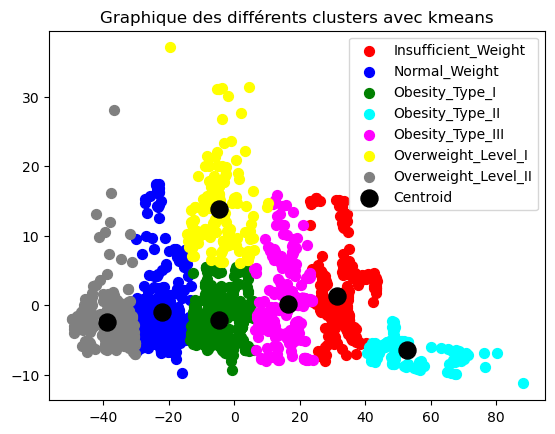

In [136]:
plt.scatter(df[labels==0,0],df[labels==0,1],s=50,c="red",label="Insufficient_Weight")
plt.scatter(df[labels==1,0],df[labels==1,1],s=50,c="blue",label="Normal_Weight")
plt.scatter(df[labels==2,0],df[labels==2,1],s=50,c="green",label="Obesity_Type_I")
plt.scatter(df[labels==3,0],df[labels==3,1],s=50,c="cyan",label="Obesity_Type_II")
plt.scatter(df[labels==4,0],df[labels==4,1],s=50,c="magenta",label="Obesity_Type_III")
plt.scatter(df[labels==5,0],df[labels==5,1],s=50,c="yellow",label="Overweight_Level_I")
plt.scatter(df[labels==6,0],df[labels==6,1],s=50,c="grey",label="Overweight_Level_II")
plt.scatter(centers[:,0],centers[:,1],s=150,c="black",label="Centroid")
plt.legend()
plt.title('Graphique des différents clusters avec kmeans')
#plt.show()

In [137]:
# ### AVEC 5 CLUSTERS 

In [138]:
# kmeans2=KMeans(n_clusters=5)
# #adapter le modèle de données
# labels2 = kmeans2.fit_predict(df)
# labels_unique2 = np.unique(labels2)
# #print(labels_unique)
# centers2 = kmeans2.cluster_centers_
# plt.scatter(df[labels2==0,0],df[labels2==0,1],s=50,c="red",label="Cluster 1")
# plt.scatter(df[labels2==1,0],df[labels2==1,1],s=50,c="blue",label="Cluster 2")
# plt.scatter(df[labels2==2,0],df[labels2==2,1],s=50,c="green",label="Cluster 3")
# plt.scatter(df[labels2==3,0],df[labels2==3,1],s=50,c="cyan",label="Cluster 4")
# plt.scatter(df[labels2==4,0],df[labels2==4,1],s=50,c="magenta",label="Cluster 5")
# plt.scatter(centers2[:,0],centers2[:,1],s=150,c="black",label="Centroid")
# plt.legend()
# plt.title('Graphique des différents clusters avec kmeans2')
# plt.show()

In [139]:
# ### On pourrait faire le graphe prédédent en boucles suivantes : avec ou sans le centre des clusters

In [140]:
# for i in labels_unique: # sans les centroid
#     plt.scatter(df[labels == i , 0] , df[labels == i , 1] , label = i)
# plt.title('Graphique2 des différents clusters avec kmeans')
# #plt.show()

In [141]:
# plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha = 0.5); 
# for i in labels_unique: # avec les centroid
#   plt.scatter(df[labels == i ,0],df[labels == i,1],alpha=0.4,label=i)
# plt.title('Graphique3 des différents clusters avec kmeans')
# #plt.show()

In [142]:
## Partagez le jeu de données pour le traitement (jeu d’entraînement, jeu de test).

In [143]:
x_train, x_test, y_train, y_test = train_test_split(attributs_data, target_data,
test_size = 0.30, random_state = 1)

In [144]:
# On a chosi d'entrainer notre jeu de données sur 70% des données et de le tester sur 30% restant
# On a pas choisi 80% pour ne peut que notre jeu de données apprenne trop le modele

# 6. Utilisez la ou les méthode(s) d’apprentissage choisie(s) (faites varier les paramètres).
# 1er modele DecisionTreeClassifier

Text(0.5, 1.0, 'Graphique du modele DecisionTree')

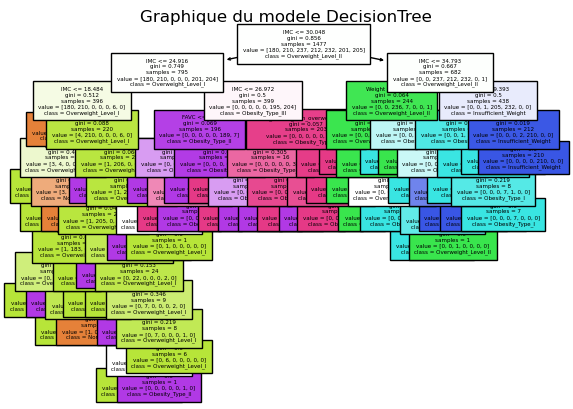

In [146]:
model_decisiontree = DecisionTreeClassifier()
model_decisiontree.fit(x_train, y_train)
fn = ['Age','Height','Weight','family_history_with_overweight','FAVC', 'FCVC','NCP','CAEC','SCC','FAF','MTRANS','IMC']
cn = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III']
plot_tree(model_decisiontree, filled=True,fontsize=4,feature_names=fn,class_names=cn)
plt.title('Graphique du modele DecisionTree')
#plt.show()

Text(0.5, 1.0, 'Graphique du modele DecisionTree1')

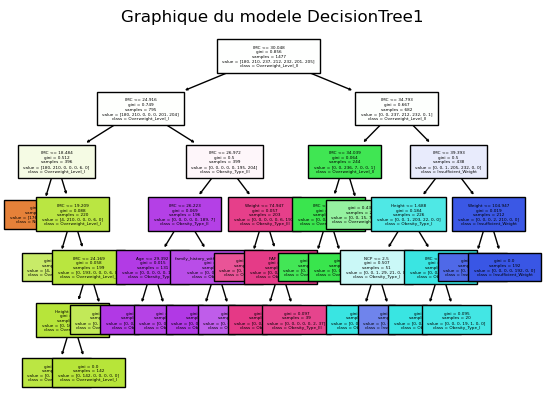

In [147]:
test1 = DecisionTreeClassifier(max_depth=10,min_samples_leaf=20)
test1.fit(x_train, y_train)
plot_tree(test1, filled=True,fontsize=3,feature_names=fn,class_names=cn)
plt.title('Graphique du modele DecisionTree1')
#plt.show() #L'arbre pas trop lisible donc on fait varier les parametres

Text(0.5, 1.0, 'Graphique du modele DecisionTree2')

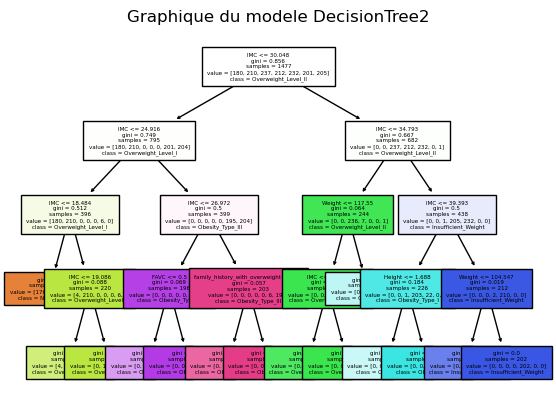

In [153]:
test2 = DecisionTreeClassifier(max_depth=4,min_samples_leaf=10)
test2.fit(x_train, y_train)
plot_tree(test2, filled=True,fontsize=4,feature_names=fn,class_names=cn)
plt.title('Graphique du modele DecisionTree2')
#plt.show() #il faut un autre test


Text(0.5, 1.0, 'Graphique du modele DecisionTree3')

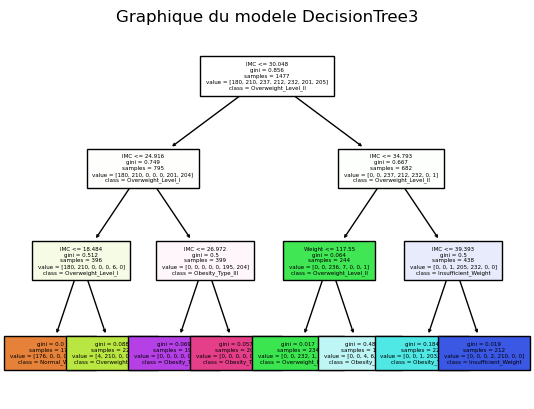

In [154]:
test3 = DecisionTreeClassifier(max_depth=3,min_samples_leaf=10)
test3.fit(x_train, y_train)
plot_tree(test3, filled=True,fontsize=4,feature_names=fn,class_names=cn)
plt.title('Graphique du modele DecisionTree3')
#plt.show() #il faut un autre test

Text(0.5, 1.0, 'Graphique du modele DecisionTree4')

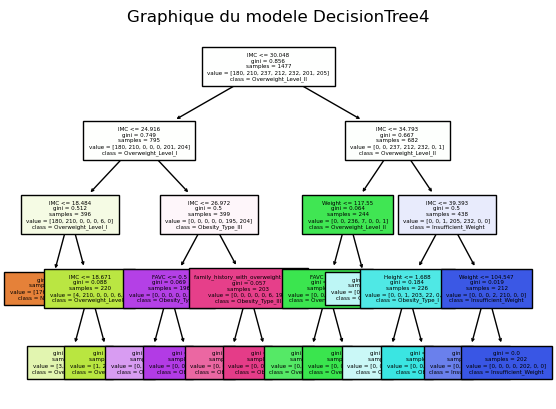

In [155]:
test4 = DecisionTreeClassifier(max_depth=4,min_samples_leaf=8)
test4.fit(x_train, y_train)
plot_tree(test4, filled=True,fontsize=4,feature_names=fn,class_names=cn)
plt.title('Graphique du modele DecisionTree4')
#plt.show() #il faut un autre test

In [156]:

# les prédictions sur le jeu de test

In [157]:
y_predtree = model_decisiontree.predict(x_test)


In [158]:

# Afficher la précision du modele DecisionTree

In [159]:
accuracy_tree = accuracy_score(y_test, y_predtree)*100
print("L'accuracy de DecisionTree : ", accuracy_tree)

L'accuracy de DecisionTree :  97.0031545741325


In [160]:
# matrice de confusion du modèle DecisionTree

In [161]:
confusiontree = confusion_matrix(y_test, y_predtree)
print("La matrice de confusion de DecisionTree est : \n", confusiontree)
print("Rapport détaillé des classifications :\n", classification_report(y_test, y_predtree))
# Graphe matrice confision
plot_confusion_matrix(model_decisiontree, x_train, y_train)
plt.title("Matrice de Confusion DecisionTree avec les données d'entrainement")
plot_confusion_matrix(model_decisiontree, x_test, y_test)
plt.title('Matrice de Confusion DecisionTree avec les données de test')
#plt.show()

La matrice de confusion de DecisionTree est : 
 [[ 92   0   0   0   0   0   0]
 [  1  73   0   0   0   3   0]
 [  0   0 107   5   0   0   2]
 [  0   0   2  83   0   0   0]
 [  0   0   0   0  92   0   0]
 [  0   3   0   0   0  83   3]
 [  0   0   0   0   0   0  85]]
Rapport détaillé des classifications :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        92
           1       0.96      0.95      0.95        77
           2       0.98      0.94      0.96       114
           3       0.94      0.98      0.96        85
           4       1.00      1.00      1.00        92
           5       0.97      0.93      0.95        89
           6       0.94      1.00      0.97        85

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



NameError: name 'plot_confusion_matrix' is not defined

In [162]:
 # L'erreur absolue du modele DecisionTree un seul echantillon de test

In [163]:
print("L'erreur absolue du DecisionTree :", metrics.mean_absolute_error(y_test, y_predtree))

L'erreur absolue du DecisionTree : 0.06782334384858044


In [164]:
# l'erreur quadratique du modèle DecisionTree tous les echantillons de test

In [165]:
MSEtree=metrics.mean_squared_error(y_test, y_predtree)
print("L'erreur quadratique du DecisionTree :", MSEtree)

L'erreur quadratique du DecisionTree : 0.2192429022082019


In [166]:
# l'erreur quadratique moyen du modèle DecisionTree

In [167]:
print("L'erreur quadratique moyenne du DecisionTree :",np.sqrt(MSEtree))

L'erreur quadratique moyenne du DecisionTree : 0.4682338114747822


In [168]:
# 2em modele Gaussian
model_gauss = GaussianNB()
model_gauss.fit(x_train,y_train)
y_predgauss = model_gauss.predict(x_test)
#evaluation du modèle
accuracy_gauss = accuracy_score(y_test, y_predgauss)*100
print("L'accuracy de Gauss : ",accuracy_gauss)

L'accuracy de Gauss :  83.75394321766562


In [169]:
#matrice de confusion du modèle de Gauss
confusiongauss = confusion_matrix(y_test, y_predgauss)
print("La matrice de confusion de Gaussian est : \n", confusiongauss)
print("Rapport détaillé des classifications Gaussian :\n", classification_report(y_test, y_predgauss))
# Graphe matrice confision
plot_confusion_matrix(model_gauss, x_train, y_train)
plt.title("Matrice de Confusion Gaussian avec les données d'entrainement")
plot_confusion_matrix(model_gauss, x_test, y_test)
plt.title("Matrice de Confusion Gaussian avec les données de test")
#plt.show()

La matrice de confusion de Gaussian est : 
 [[88  4  0  0  0  0  0]
 [ 8 61  0  0  0  8  0]
 [ 0  5 86  7  9  0  7]
 [ 0  1  0 72 12  0  0]
 [ 0  0  0  1 91  0  0]
 [ 0  6  0  0 10 57 16]
 [ 0  1  2  0  4  2 76]]
Rapport détaillé des classifications Gaussian :
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        92
           1       0.78      0.79      0.79        77
           2       0.98      0.75      0.85       114
           3       0.90      0.85      0.87        85
           4       0.72      0.99      0.83        92
           5       0.85      0.64      0.73        89
           6       0.77      0.89      0.83        85

    accuracy                           0.84       634
   macro avg       0.85      0.84      0.83       634
weighted avg       0.85      0.84      0.84       634



NameError: name 'plot_confusion_matrix' is not defined

In [170]:
#L'erreur absolue du modele Gauss un seul echantillon de test
print("L'erreur absolue du Gaussian :", metrics.mean_absolute_error(y_test, y_predgauss))
#l'erreur quadratique du modèle Gauss tous les echantillons de test
MSEgauss=metrics.mean_squared_error(y_test, y_predgauss)
print("L'erreur quadratique du Gaussian :", MSEgauss)
#l'erreur quadratique moyen du modèle Gauss
print("L'erreur quadratique moyenne du Gaussian :",np.sqrt(MSEgauss))


L'erreur absolue du Gaussian : 0.2996845425867508
L'erreur quadratique du Gaussian : 0.8107255520504731
L'erreur quadratique moyenne du Gaussian : 0.9004029942478385


In [171]:
# 3em modele BernoulliNB
#instanciation
model_Bernoulli = BernoulliNB()
model_Bernoulli.fit(x_train, y_train)
#prédiction
y_predbernouille = model_Bernoulli.predict(x_test)
#evaluation du modèle
accuracy_b = accuracy_score(y_test, y_predbernouille)*100
print("L'accuracy de Bernouilli : ",accuracy_b)
# On voit que la précision de Bernouilli est vraiment très mauvaise comparer aux
# autres donc pas besoin d'approfondissement

L'accuracy de Bernouilli :  32.33438485804416


In [172]:
# 4em modele Regression lineaire
lmodellineaire = LinearRegression()
lmodellineaire.fit(x_train, y_train)
y_predlineaire = lmodellineaire.predict(x_test)
print("Training Accuracy :", lmodellineaire.score(x_train, y_train))
print("Testing Accuracy :", lmodellineaire.score(x_test, y_test))
r2 = r2_score(y_test, y_predlineaire)*100
print("L'accuracy de la regression linéaire : ", r2)
rmse = (np.sqrt(mean_squared_error(y_test, y_predlineaire)))
# #On utilise deux métriques pour l’évaluation L’erreur quadratique moyenne
# #(l’erreur d’estimation) et le R-square (la qualité du modèle de régression)
# # Le modele de regression lineaire ne sera pas un bon choix vu la faible
# # du modele donc pas besoin d'en faire plus de détails

Training Accuracy : 0.2776700359131885
Testing Accuracy : 0.2861945557318216
L'accuracy de la regression linéaire :  28.61945557318216


In [173]:
# 5em modele Regression logistique
model_logist = LogisticRegression(penalty='none',solver='newton-cg')
model_logist.fit(x_train, y_train)
y_predlogist = model_logist.predict(x_test)
accuracy_logist = accuracy_score(y_test, y_predlogist)*100
print("L'accuracy de la regression logistique : ",accuracy_logist)

C:\Users\DAFFE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  .. versionadded:: 0.17


L'accuracy de la regression logistique :  96.52996845425868


C:\Users\DAFFE\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warn=True,


In [174]:
#matrice de confusion du modèle
confusionlogist = confusion_matrix(y_test, y_predlogist)
print("La matrice de confusion de la Logistique est : \n", confusionlogist)
print("Rapport détaillé des classifications Logistique :\n", classification_report(y_test, y_predlogist))
# Graphe matrice confision
plot_confusion_matrix(model_logist, x_train, y_train)
plt.title("Matrice de Confusion Logistique avec les données d'entrainement")
plot_confusion_matrix(model_logist, x_test, y_test)
plt.title("Matrice de Confusion Logistique avec les données de test")
#plt.show()

La matrice de confusion de la Logistique est : 
 [[ 91   1   0   0   0   0   0]
 [  2  74   0   0   0   1   0]
 [  0   0 110   2   1   0   1]
 [  0   0   0  85   0   0   0]
 [  0   0   0   0  92   0   0]
 [  0   0   0   0   0  80   9]
 [  0   0   1   0   0   4  80]]
Rapport détaillé des classifications Logistique :
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        92
           1       0.99      0.96      0.97        77
           2       0.99      0.96      0.98       114
           3       0.98      1.00      0.99        85
           4       0.99      1.00      0.99        92
           5       0.94      0.90      0.92        89
           6       0.89      0.94      0.91        85

    accuracy                           0.97       634
   macro avg       0.96      0.97      0.96       634
weighted avg       0.97      0.97      0.97       634



NameError: name 'plot_confusion_matrix' is not defined

In [175]:

#L'erreur absolue du modele un seul echantillon de test
print("L'erreur absolue de la logistique :", metrics.mean_absolute_error(y_test, y_predlogist))
#l'erreur quadratique du modèle tous les echantillons de test
MSElogist=metrics.mean_squared_error(y_test, y_predlogist)
print("L'erreur quadratique de la logistique :", MSElogist)
#l'erreur quadratique moyen du modèle
print("L'erreur quadratique moyenne de la logistique :",np.sqrt(MSElogist))

L'erreur absolue de la logistique : 0.050473186119873815
L'erreur quadratique de la logistique : 0.11041009463722397
L'erreur quadratique moyenne de la logistique : 0.3322801448134149


In [176]:

# Modele DecisionTreeRegressor

print("New model\n")
m1 = DecisionTreeRegressor()
m1.fit(x_train, y_train)
y1_pred = m1.predict(x_test)
print("Training Accuracy :", m1.score(x_train, y_train))
print("Testing Accuracy :", m1.score(x_test, y_test))
accuracy_m1 = accuracy_score(y_test, y1_pred)*100
print("L'accuracy du modele DecisionTreeRegressor est : ",accuracy_m1)

New model

Training Accuracy : 1.0
Testing Accuracy : 0.9305564185062463
L'accuracy du modele DecisionTreeRegressor est :  96.68769716088327


In [177]:
#matrice de confusion du modèle
confusionm1 = confusion_matrix(y_test, y1_pred)
print("La matrice de confusion DecisionTreeRegressor est : \n", confusionm1)
print("Rapport détaillé des classifications DecisionTreeRegressor :\n", classification_report(y_test, y1_pred))


La matrice de confusion DecisionTreeRegressor est : 
 [[ 92   0   0   0   0   0   0]
 [  1  71   0   0   0   5   0]
 [  0   0 107   5   0   0   2]
 [  0   0   2  83   0   0   0]
 [  0   0   0   0  92   0   0]
 [  0   3   0   0   0  83   3]
 [  0   0   0   0   0   0  85]]
Rapport détaillé des classifications DecisionTreeRegressor :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        92
           1       0.96      0.92      0.94        77
           2       0.98      0.94      0.96       114
           3       0.94      0.98      0.96        85
           4       1.00      1.00      1.00        92
           5       0.94      0.93      0.94        89
           6       0.94      1.00      0.97        85

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



In [178]:
#L'erreur absolue du modele un seul echantillon de test
print("L'erreur absolue DecisionTreeRegressor :", metrics.mean_absolute_error(y_test, y1_pred))
#l'erreur quadratique du modèle tous les echantillons de test
MSEm1=metrics.mean_squared_error(y_test, y1_pred)
print("L'erreur quadratique DecisionTreeRegressor :", MSEm1)

L'erreur absolue DecisionTreeRegressor : 0.0804416403785489
L'erreur quadratique DecisionTreeRegressor : 0.2697160883280757


L'erreur quadratique moyenne DecisionTreeRegressor : 0.5193419762815978


Text(0.5, 1.0, 'Graphique du modele DecisionTreeRegressor')

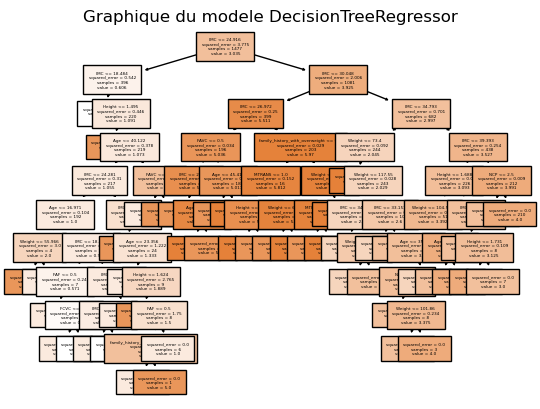

In [179]:
#l'erreur quadratique moyen du modèle
print("L'erreur quadratique moyenne DecisionTreeRegressor :",np.sqrt(MSEm1))

n = ['Age','Height','Weight','family_history_with_overweight','FAVC', 'FCVC','NCP','CAEC','SCC','FAF','MTRANS','IMC']
cn = ['Normal_Weight','Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Insufficient_Weight','Obesity_Type_II','Obesity_Type_III']
plot_tree(m1, filled=True,fontsize=3,feature_names=fn,class_names=cn)
plt.title('Graphique du modele DecisionTreeRegressor') #Difficile à lire ce graphe donc on va changer les parametres pour avoir moins de partitions (noeuds)
#plt.show() #max_depth=10,min_samples_leaf=20

Text(0.5, 1.0, 'Graphique du modele DecisionTreeRegressor2')

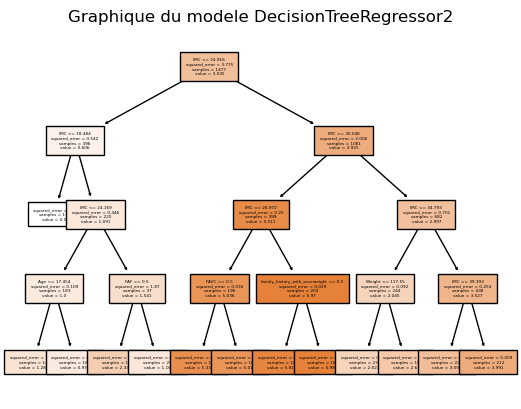

In [180]:
# Modele pour avoir un arbre plus lisible
m2 = DecisionTreeRegressor(max_depth=4,min_samples_leaf=10)
m2.fit(x_train, y_train)
plot_tree(m2, filled=True,fontsize=3,feature_names=fn,class_names=cn)
plt.title('Graphique du modele DecisionTreeRegressor2')
#plt.show()

In [181]:
#Cette arbre de décision n'est pas trop parlant car n'affiche pas les classes


In [182]:
# 6em modele SVM
model_SVM = SVC(kernel = 'linear', random_state = 0)
model_SVM.fit(x_train, y_train)
y_predSVM = model_SVM.predict(x_test)

In [183]:
# On regarde le rapport de classification pour voir ce que ça donne. Et ça
# semble pas mal.
print("Prediction SVM", classification_report(y_test, y_predSVM))
accuracy_SVM = accuracy_score(y_test, y_predSVM)*100
print("L'accuracy du SVM est : ",accuracy_SVM)

Prediction SVM               precision    recall  f1-score   support

           0       0.96      0.99      0.97        92
           1       0.97      0.92      0.95        77
           2       0.97      0.97      0.97       114
           3       0.98      0.99      0.98        85
           4       0.99      1.00      0.99        92
           5       0.94      0.91      0.93        89
           6       0.91      0.93      0.92        85

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

L'accuracy du SVM est :  96.05678233438486


In [184]:
#matrice de confusion du modèle
confusionSVM = confusion_matrix(y_test, y_predSVM)
print("La matrice de confusion du SVM est : \n", confusionSVM)
print("Rapport détaillé des classifications SVM :\n", classification_report(y_test, y_predSVM))
# Graphe matrice confision
plot_confusion_matrix(model_SVM, x_train, y_train)
plt.title("Matrice de Confusion SVM avec les données d'entrainement")
plot_confusion_matrix(model_SVM, x_test, y_test)
plt.title("Matrice de Confusion SVM avec les données de test")
#plt.show()

La matrice de confusion du SVM est : 
 [[ 91   1   0   0   0   0   0]
 [  4  71   0   0   0   2   0]
 [  0   0 111   2   0   0   1]
 [  0   0   0  84   1   0   0]
 [  0   0   0   0  92   0   0]
 [  0   1   0   0   0  81   7]
 [  0   0   3   0   0   3  79]]
Rapport détaillé des classifications SVM :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        92
           1       0.97      0.92      0.95        77
           2       0.97      0.97      0.97       114
           3       0.98      0.99      0.98        85
           4       0.99      1.00      0.99        92
           5       0.94      0.91      0.93        89
           6       0.91      0.93      0.92        85

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634



NameError: name 'plot_confusion_matrix' is not defined

In [185]:
#L'erreur absolue du modele un seul echantillon de test
print("L'erreur absolue de SVM :", metrics.mean_absolute_error(y_test, y_predSVM))
#l'erreur quadratique du modèle tous les echantillons de test
MSESVM=metrics.mean_squared_error(y_test, y_predSVM)
print("L'erreur quadratique de SVM :", MSESVM)
#l'erreur quadratique moyen du modèle
print("L'erreur quadratique moyenne de SVM :",np.sqrt(MSESVM))


L'erreur absolue de SVM : 0.07255520504731862
L'erreur quadratique de SVM : 0.20504731861198738
L'erreur quadratique moyenne de SVM : 0.4528215085571658


In [186]:
# 7em modele k-NN
# K-Nearest Neighbor / k plus proche voisins
model_knn = KNeighborsClassifier(n_neighbors = 7)
model_knn.fit(x_train, y_train)
#Prediction of test set
y_predknn = model_knn.predict(x_test)
#print(prediction_knn)
print("Prediction kNN", model_knn.score(x_train, y_train))
accuracy_knn = accuracy_score(y_test, y_predknn)*100
print("L'accuracy du kNN est : ",accuracy_knn)


Prediction kNN 0.947190250507786
L'accuracy du kNN est :  92.27129337539432


In [187]:
#matrice de confusion du modèle
confusionknn = confusion_matrix(y_test, y_predknn)
print("La matrice de confusion du kNN est : \n", confusionknn)
print("Rapport détaillé des classifications kNN :\n", classification_report(y_test, y_predknn))
# Graphe matrice confision
plot_confusion_matrix(model_knn, x_train, y_train)
plt.title("Matrice de Confusion kNN avec les données d'entrainement")
plot_confusion_matrix(model_knn, x_test, y_test)
plt.title("Matrice de Confusion kNN avec les données de test")
#plt.show()

La matrice de confusion du kNN est : 
 [[ 89   3   0   0   0   0   0]
 [  6  55   0   0   0  15   1]
 [  0   0 110   1   0   0   3]
 [  0   0   0  85   0   0   0]
 [  0   0   0   0  92   0   0]
 [  0   0   0   0   0  85   4]
 [  0   0   7   0   0   9  69]]
Rapport détaillé des classifications kNN :
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        92
           1       0.95      0.71      0.81        77
           2       0.94      0.96      0.95       114
           3       0.99      1.00      0.99        85
           4       1.00      1.00      1.00        92
           5       0.78      0.96      0.86        89
           6       0.90      0.81      0.85        85

    accuracy                           0.92       634
   macro avg       0.93      0.92      0.92       634
weighted avg       0.93      0.92      0.92       634



NameError: name 'plot_confusion_matrix' is not defined

In [188]:
#L'erreur absolue du modele un seul echantillon de test
print("L'erreur absolue du kNN :", metrics.mean_absolute_error(y_test, y_predknn))
#l'erreur quadratique du modèle tous les echantillons de test
MSEknn=metrics.mean_squared_error(y_test, y_predknn)
print("L'erreur quadratique du kNN :", MSEknn)
#l'erreur quadratique moyen du modèle
print("L'erreur quadratique moyenne du kNN :",np.sqrt(MSEknn))



L'erreur absolue du kNN : 0.20189274447949526
L'erreur quadratique du kNN : 0.7066246056782335
L'erreur quadratique moyenne du kNN : 0.8406096630887807


In [189]:
# Comparaison des differents modeles selon la precision
print("L'accuracy DecisionTree est : ",accuracy_tree) #4em
print("L'accuracy Gaussian est : ",accuracy_gauss) #6em
print("L'accuracy DecisionTreeRegressor est : ",accuracy_m1) #2em
print("L'accuracy Logistique est : ",accuracy_logist) #1ere
print("L'accuracy SVM est : ",accuracy_SVM) #3em
print("L'accuracy kNN est : ",accuracy_knn) #5em

L'accuracy DecisionTree est :  97.0031545741325
L'accuracy Gaussian est :  83.75394321766562
L'accuracy DecisionTreeRegressor est :  96.68769716088327
L'accuracy Logistique est :  96.52996845425868
L'accuracy SVM est :  96.05678233438486
L'accuracy kNN est :  92.27129337539432


In [190]:
# Comparaison des differents modeles selon l'erreur absolue
print("L'erreur absolue DecisionTree :", metrics.mean_absolute_error(y_test, y_predtree))#4em
print("L'erreur absolue Gaussian :", metrics.mean_absolute_error(y_test, y_predgauss))#6em
print("L'erreur absolue DecisionTreeRegressor :", metrics.mean_absolute_error(y_test, y1_pred))#3m
print("L'erreur absolue Logistique :", metrics.mean_absolute_error(y_test, y_predlogist))#1er
print("L'erreur absolue SVM :", metrics.mean_absolute_error(y_test, y_predSVM))#2em
print("L'erreur absolue kNN :", metrics.mean_absolute_error(y_test, y_predknn))#5em


L'erreur absolue DecisionTree : 0.06782334384858044
L'erreur absolue Gaussian : 0.2996845425867508
L'erreur absolue DecisionTreeRegressor : 0.0804416403785489
L'erreur absolue Logistique : 0.050473186119873815
L'erreur absolue SVM : 0.07255520504731862
L'erreur absolue kNN : 0.20189274447949526


In [191]:
# Comparaison des differents modeles selon l'erreur quadratique moyenne
print("L'erreur quadratique moyenne DecisionTree :",np.sqrt(MSEtree))#3em
print("L'erreur quadratique moyenne Gaussian :",np.sqrt(MSEgauss))#6em
print("L'erreur quadratique moyenne DecisionTreeRegressor :",np.sqrt(MSEm1))#4em
print("L'erreur quadratique moyenne Logistique :",np.sqrt(MSElogist))#1er
print("L'erreur quadratique moyenne SVM :",np.sqrt(MSESVM))#2em
print("L'erreur quadratique moyenne kNN :",np.sqrt(MSEknn))#5em

L'erreur quadratique moyenne DecisionTree : 0.4682338114747822
L'erreur quadratique moyenne Gaussian : 0.9004029942478385
L'erreur quadratique moyenne DecisionTreeRegressor : 0.5193419762815978
L'erreur quadratique moyenne Logistique : 0.3322801448134149
L'erreur quadratique moyenne SVM : 0.4528215085571658
L'erreur quadratique moyenne kNN : 0.8406096630887807


In [192]:
# Comparaison des résultats graphiquement

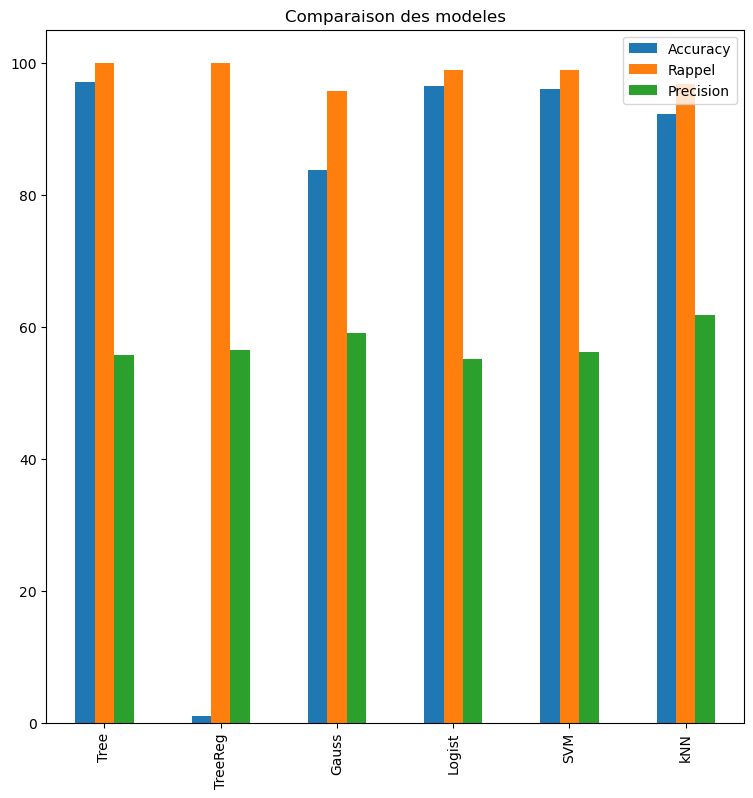

In [193]:

#cm_annk = confusion_matrix(y_test, y_pred)
recall_m1 = confusionm1[0][0]/(confusionm1[0][0] + confusionm1[0][1])
precision_m1 = confusionm1[0][0]/(confusionm1[0][0]+confusionm1[1][1])
accuracy_m11 = accuracy_score(y_test, y1_pred)
recall_tree = confusiontree[0][0]/(confusiontree[0][0] + confusiontree[0][1])
precision_tree = confusiontree[0][0]/(confusiontree[0][0]+confusiontree[1][1])
accuracy_tree1 = accuracy_score(y_test, y_predtree)
recall_gauss = confusiongauss[0][0]/(confusiongauss[0][0] + confusiongauss[0][1])
precision_gauss = confusiongauss[0][0]/(confusiongauss[0][0]+confusiongauss[1][1])
accuracy_gauss1 = accuracy_score(y_test, y_predgauss)
recall_logist = confusionlogist[0][0]/(confusionlogist[0][0] + confusionlogist[0][1])
precision_logist = confusionlogist[0][0]/(confusionlogist[0][0]+confusionlogist[1][1])
accuracy_logist1 = accuracy_score(y_test, y_predlogist)
recall_SVM = confusionSVM[0][0]/(confusionSVM[0][0] + confusionSVM[0][1])
precision_SVM = confusionSVM[0][0]/(confusionSVM[0][0]+confusionSVM[1][1])
accuracy_SVM1 = accuracy_score(y_test, y_predSVM)
recall_knn = confusionknn[0][0]/(confusionknn[0][0] + confusionknn[0][1])
precision_knn = confusionknn[0][0]/(confusionknn[0][0]+confusionknn[1][1])
accuracy_knn1 = accuracy_score(y_test, y_predknn)
results = {'Accuracy': [accuracy_tree1*100,accuracy_m11,accuracy_gauss1*100,accuracy_logist1*100,accuracy_SVM1*100,accuracy_knn1*100],
          'Rappel': [recall_tree*100,recall_m1*100,recall_gauss*100,recall_logist*100,recall_SVM*100,recall_knn*100],
          'Precision': [precision_tree*100,precision_m1*100,precision_gauss*100,precision_logist*100,precision_SVM*100,precision_knn*100]}
index = ['Tree','TreeReg','Gauss','Logist','SVM','kNN']
results = pd.DataFrame(results,index=index)
fig =results.plot(kind='bar',title='Comparaison des modeles',figsize =(9,9)).get_figure()
#plt.show()


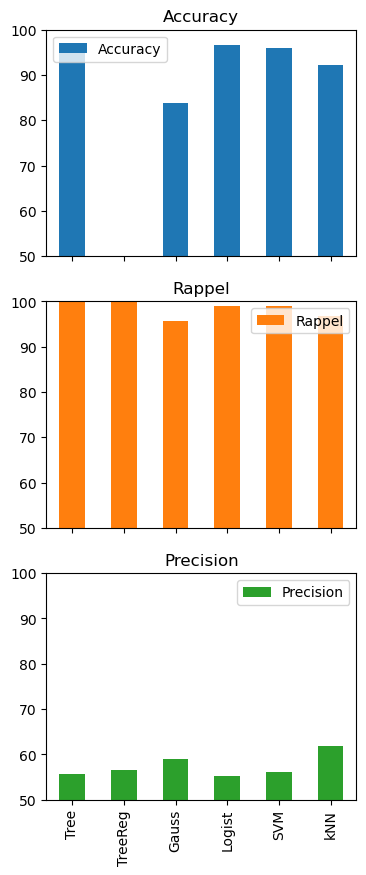

In [194]:
results.plot(subplots=True,kind ='bar',figsize=(4,10),ylim=[50,100]);
#plt.show()

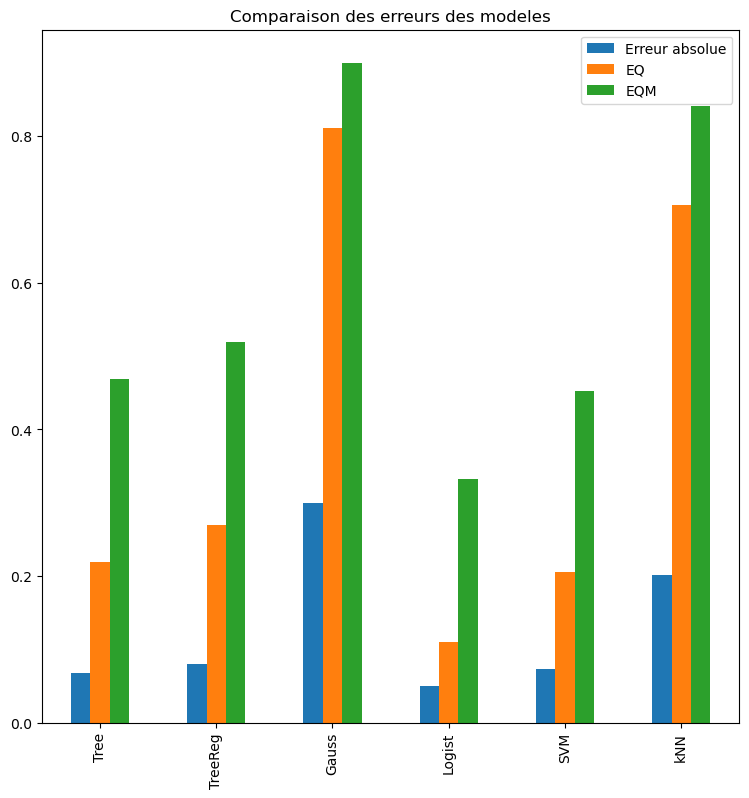

In [195]:
results2 = {'Erreur absolue': [metrics.mean_absolute_error(y_test, y_predtree),metrics.mean_absolute_error(y_test, y1_pred),metrics.mean_absolute_error(y_test, y_predgauss),metrics.mean_absolute_error(y_test, y_predlogist),metrics.mean_absolute_error(y_test, y_predSVM),metrics.mean_absolute_error(y_test, y_predknn)],
          'EQ': [MSEtree,MSEm1,MSEgauss,MSElogist,MSESVM,MSEknn],
          'EQM': [np.sqrt(MSEtree),np.sqrt(MSEm1),np.sqrt(MSEgauss),np.sqrt(MSElogist),np.sqrt(MSESVM),np.sqrt(MSEknn)]}
index = ['Tree','TreeReg','Gauss','Logist','SVM','kNN']
results = pd.DataFrame(results2,index=index)
fig =results.plot(kind='bar',title='Comparaison des erreurs des modeles',figsize =(9,9)).get_figure()
#plt.show()


In [196]:
#### COMPARAISON AVEC LES COURBES DE ROC ####
### POUR AFFICHER LES COURBES DE ROC
# Rendre binaire le contenu du label y_test et les y_pred
# Affecter à la variable n_classes le nombre de classes présent
# dans le jeu de données
### Courbe ROC DecisionTree

In [197]:
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
y_p1 = label_binarize(y_predtree, classes=[0, 1, 2, 3, 4, 5, 6])
n_classes = y_test.shape[1] # car y.shape = (2111, 7) donc 7 classes : OKAY
#print(y_p1)

In [198]:
# Créez trois dictionnaires et nommez-les fpr, tpr et roc_auc :

In [199]:
tfp = dict() # dico avec les faux positifs
tvp = dict() # dico avec les vrai positifs
roc_auc = dict() # dic avec les aires

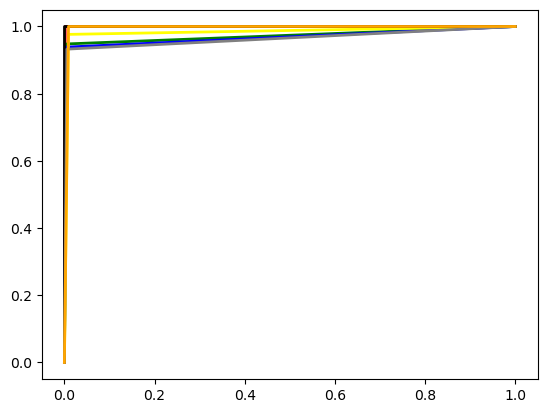

In [200]:
for i in range(n_classes): # boucle pour parcourir les classes
    tfp[i], tvp[i], seuils = roc_curve(y_test[:, i], y_p1[:, i])
    roc_auc[i] = auc(tfp[i], tvp[i]) # calcule l'aire de la courbe

plt.figure()
plt.plot(tfp[0], tvp[0], color='red', lw=2,label='courbe ROC: 0 (surface = %0.3f)' % roc_auc[0])
plt.plot(tfp[1], tvp[1], color='green', lw=2,label='courbe ROC: 1 (surface = %1.3f)' % roc_auc[1])
plt.plot(tfp[2], tvp[2], color='blue', lw=2,label='courbe ROC: 2 (surface = %2.3f)' % roc_auc[2])
plt.plot(tfp[3], tvp[3], color='yellow', lw=2,label='courbe ROC: 3 (surface = %3.3f)' % roc_auc[3])
plt.plot(tfp[4], tvp[4], color='black', lw=2,label='courbe ROC: 4 (surface = %4.3f)' % roc_auc[4])
plt.plot(tfp[5], tvp[5], color='grey', lw=2,label='courbe ROC: 5 (surface = %5.3f)' % roc_auc[5])
plt.plot(tfp[6], tvp[6], color='orange', lw=2,label='courbe ROC: 6 (surface = %6.3f)' % roc_auc[6])


In [201]:
#faire apparaître dans le graphique aussi la ligne théorique correspondante à
#un modèle avec AUC = 0:5 (f(x) = x),

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


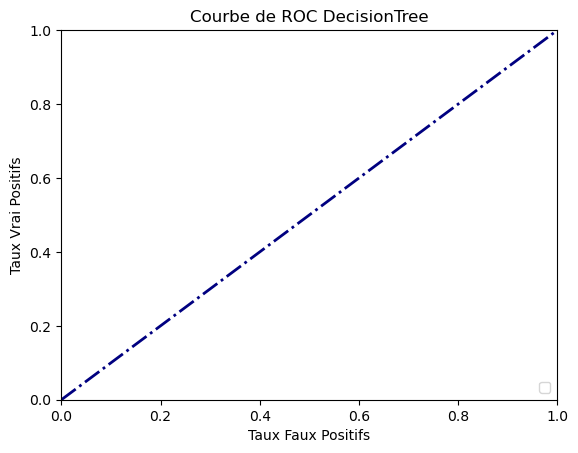

In [202]:

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='dashdot')
#Placer les délimitations de votre courbe ce qui veut dire que le domaine des
#faux et vrais positifs est [0; 1]
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
#Placer sur votre courbe les étiquettes associées aux axes des abcisses et des
#ordonnées, 'Taux Faux Positifs' et 'Taux Vrai Positifs'.
plt.title('Courbe de ROC DecisionTree')
#titre à votre courbe, grâce à la méthode title().
plt.xlabel('Taux Faux Positifs')
plt.ylabel('Taux Vrai Positifs')
#les étiquettes associées aux axes des abcisses et des ordonnées,
#'Taux Faux Positifs' et 'Taux Vrai Positifs'.
plt.legend(loc = "lower right")
#legende de la courbe en bas et a droite de la gure (lower right). Les
#possibilités sont : upper left, upper right et lower left.
#plt.show()

In [203]:
### Courbe ROC Gaussian

In [204]:
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
y_p1 = label_binarize(y_predgauss, classes=[0, 1, 2, 3, 4, 5, 6])

tfp = dict()
tvp = dict()
roc_auc = dict()

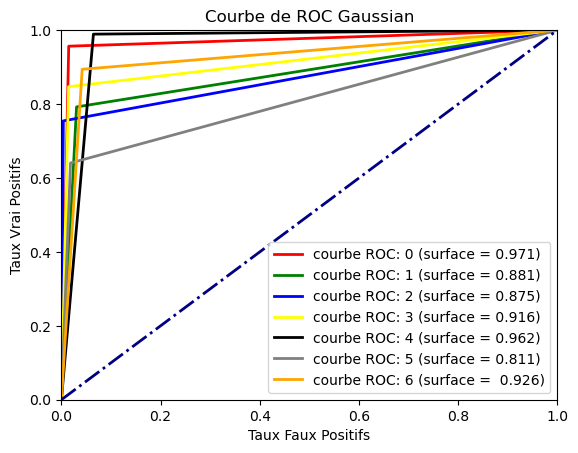

In [205]:
for i in range(n_classes):
    tfp[i], tvp[i], seuils = roc_curve(y_test[:, i], y_p1[:, i])
    roc_auc[i] = auc(tfp[i], tvp[i])

plt.figure()
plt.plot(tfp[0], tvp[0], color='red', lw=2,label='courbe ROC: 0 (surface = %0.3f)' % roc_auc[0])
plt.plot(tfp[1], tvp[1], color='green', lw=2,label='courbe ROC: 1 (surface = %1.3f)' % roc_auc[1])
plt.plot(tfp[2], tvp[2], color='blue', lw=2,label='courbe ROC: 2 (surface = %2.3f)' % roc_auc[2])
plt.plot(tfp[3], tvp[3], color='yellow', lw=2,label='courbe ROC: 3 (surface = %3.3f)' % roc_auc[3])
plt.plot(tfp[4], tvp[4], color='black', lw=2,label='courbe ROC: 4 (surface = %4.3f)' % roc_auc[4])
plt.plot(tfp[5], tvp[5], color='grey', lw=2,label='courbe ROC: 5 (surface = %5.3f)' % roc_auc[5])
plt.plot(tfp[6], tvp[6], color='orange', lw=2,label='courbe ROC: 6 (surface = %6.3f)' % roc_auc[6])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='dashdot')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.title('Courbe de ROC Gaussian')
plt.xlabel('Taux Faux Positifs')
plt.ylabel('Taux Vrai Positifs')
plt.legend(loc = "lower right")
#plt.show()

In [206]:
### Courbe ROC DecisionTreeRegressor
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
y_p1 = label_binarize(y1_pred, classes=[0, 1, 2, 3, 4, 5, 6])

tfp = dict()
tvp = dict()
roc_auc = dict()

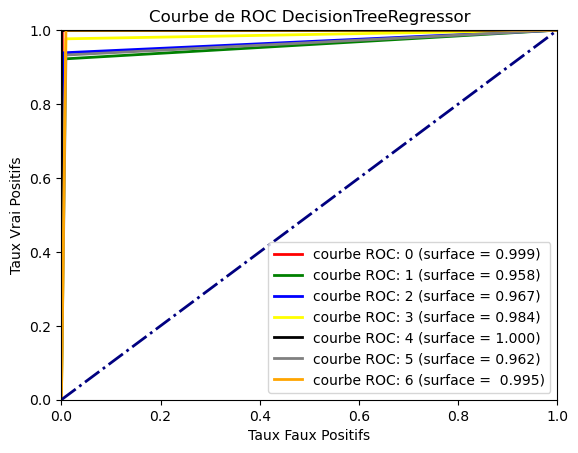

In [207]:
for i in range(n_classes):
    tfp[i], tvp[i], seuils = roc_curve(y_test[:, i], y_p1[:, i])
    roc_auc[i] = auc(tfp[i], tvp[i])

plt.figure()
plt.plot(tfp[0], tvp[0], color='red', lw=2,label='courbe ROC: 0 (surface = %0.3f)' % roc_auc[0])
plt.plot(tfp[1], tvp[1], color='green', lw=2,label='courbe ROC: 1 (surface = %1.3f)' % roc_auc[1])
plt.plot(tfp[2], tvp[2], color='blue', lw=2,label='courbe ROC: 2 (surface = %2.3f)' % roc_auc[2])
plt.plot(tfp[3], tvp[3], color='yellow', lw=2,label='courbe ROC: 3 (surface = %3.3f)' % roc_auc[3])
plt.plot(tfp[4], tvp[4], color='black', lw=2,label='courbe ROC: 4 (surface = %4.3f)' % roc_auc[4])
plt.plot(tfp[5], tvp[5], color='grey', lw=2,label='courbe ROC: 5 (surface = %5.3f)' % roc_auc[5])
plt.plot(tfp[6], tvp[6], color='orange', lw=2,label='courbe ROC: 6 (surface = %6.3f)' % roc_auc[6])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='dashdot')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.title('Courbe de ROC DecisionTreeRegressor')
plt.xlabel('Taux Faux Positifs')
plt.ylabel('Taux Vrai Positifs')
plt.legend(loc = "lower right")
#plt.show()


In [208]:

### Courbe ROC Logistique
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
y_p1 = label_binarize(y_predlogist, classes=[0, 1, 2, 3, 4, 5, 6])

tfp = dict()
tvp = dict()
roc_auc = dict()

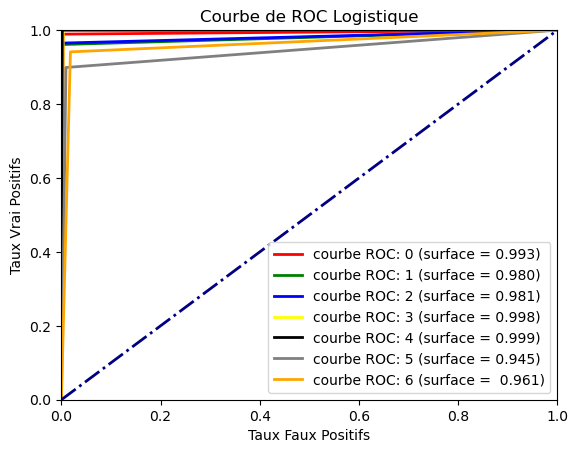

In [209]:
for i in range(n_classes):
    tfp[i], tvp[i], seuils = roc_curve(y_test[:, i], y_p1[:, i])
    roc_auc[i] = auc(tfp[i], tvp[i])

plt.figure()
plt.plot(tfp[0], tvp[0], color='red', lw=2,label='courbe ROC: 0 (surface = %0.3f)' % roc_auc[0])
plt.plot(tfp[1], tvp[1], color='green', lw=2,label='courbe ROC: 1 (surface = %1.3f)' % roc_auc[1])
plt.plot(tfp[2], tvp[2], color='blue', lw=2,label='courbe ROC: 2 (surface = %2.3f)' % roc_auc[2])
plt.plot(tfp[3], tvp[3], color='yellow', lw=2,label='courbe ROC: 3 (surface = %3.3f)' % roc_auc[3])
plt.plot(tfp[4], tvp[4], color='black', lw=2,label='courbe ROC: 4 (surface = %4.3f)' % roc_auc[4])
plt.plot(tfp[5], tvp[5], color='grey', lw=2,label='courbe ROC: 5 (surface = %5.3f)' % roc_auc[5])
plt.plot(tfp[6], tvp[6], color='orange', lw=2,label='courbe ROC: 6 (surface = %6.3f)' % roc_auc[6])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='dashdot')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.title('Courbe de ROC Logistique')
plt.xlabel('Taux Faux Positifs')
plt.ylabel('Taux Vrai Positifs')
plt.legend(loc = "lower right")
#plt.show()


In [210]:
### Courbe ROC SVM
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
y_p1 = label_binarize(y_predSVM, classes=[0, 1, 2, 3, 4, 5, 6])

tfp = dict()
tvp = dict()
roc_auc = dict()

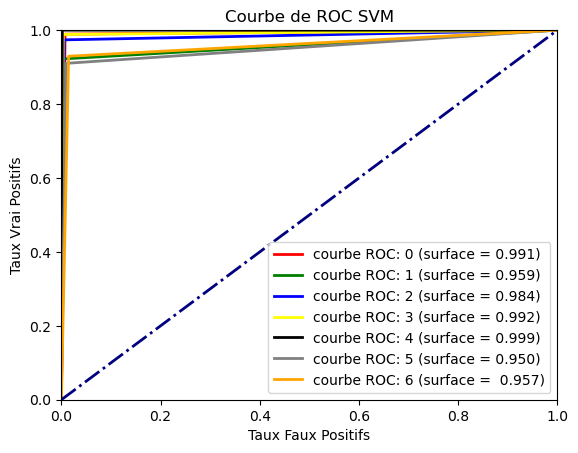

In [211]:

for i in range(n_classes):
    tfp[i], tvp[i], seuils = roc_curve(y_test[:, i], y_p1[:, i])
    roc_auc[i] = auc(tfp[i], tvp[i])

plt.figure()
plt.plot(tfp[0], tvp[0], color='red', lw=2,label='courbe ROC: 0 (surface = %0.3f)' % roc_auc[0])
plt.plot(tfp[1], tvp[1], color='green', lw=2,label='courbe ROC: 1 (surface = %1.3f)' % roc_auc[1])
plt.plot(tfp[2], tvp[2], color='blue', lw=2,label='courbe ROC: 2 (surface = %2.3f)' % roc_auc[2])
plt.plot(tfp[3], tvp[3], color='yellow', lw=2,label='courbe ROC: 3 (surface = %3.3f)' % roc_auc[3])
plt.plot(tfp[4], tvp[4], color='black', lw=2,label='courbe ROC: 4 (surface = %4.3f)' % roc_auc[4])
plt.plot(tfp[5], tvp[5], color='grey', lw=2,label='courbe ROC: 5 (surface = %5.3f)' % roc_auc[5])
plt.plot(tfp[6], tvp[6], color='orange', lw=2,label='courbe ROC: 6 (surface = %6.3f)' % roc_auc[6])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='dashdot')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.title('Courbe de ROC SVM')
plt.xlabel('Taux Faux Positifs')
plt.ylabel('Taux Vrai Positifs')
plt.legend(loc = "lower right")
#plt.show()


In [212]:
### Courbe ROC kNN
y_test = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
y_p1 = label_binarize(y_predknn, classes=[0, 1, 2, 3, 4, 5, 6])

tfp = dict()
tvp = dict()
roc_auc = dict()

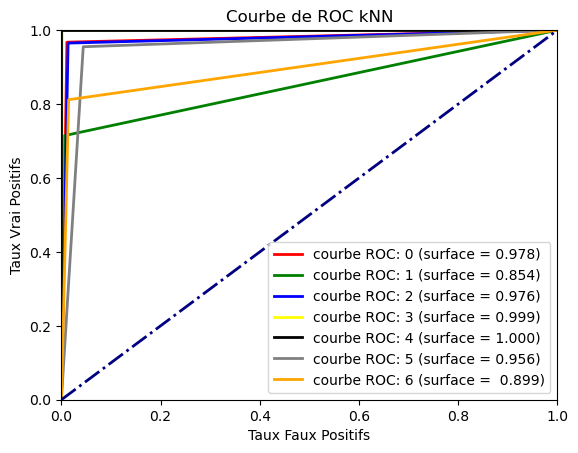

In [213]:
for i in range(n_classes):
    tfp[i], tvp[i], seuils = roc_curve(y_test[:, i], y_p1[:, i])
    roc_auc[i] = auc(tfp[i], tvp[i])

plt.figure()
plt.plot(tfp[0], tvp[0], color='red', lw=2,label='courbe ROC: 0 (surface = %0.3f)' % roc_auc[0])
plt.plot(tfp[1], tvp[1], color='green', lw=2,label='courbe ROC: 1 (surface = %1.3f)' % roc_auc[1])
plt.plot(tfp[2], tvp[2], color='blue', lw=2,label='courbe ROC: 2 (surface = %2.3f)' % roc_auc[2])
plt.plot(tfp[3], tvp[3], color='yellow', lw=2,label='courbe ROC: 3 (surface = %3.3f)' % roc_auc[3])
plt.plot(tfp[4], tvp[4], color='black', lw=2,label='courbe ROC: 4 (surface = %4.3f)' % roc_auc[4])
plt.plot(tfp[5], tvp[5], color='grey', lw=2,label='courbe ROC: 5 (surface = %5.3f)' % roc_auc[5])
plt.plot(tfp[6], tvp[6], color='orange', lw=2,label='courbe ROC: 6 (surface = %6.3f)' % roc_auc[6])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='dashdot')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.title('Courbe de ROC kNN')
plt.xlabel('Taux Faux Positifs')
plt.ylabel('Taux Vrai Positifs')
plt.legend(loc = "lower right")
#plt.show()

In [214]:




# ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
# 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
# 'Obesity_Type_III']
# [1 5 6 2 0 3 4]

